<a href="https://colab.research.google.com/github/Aditya2600/AdAdEase-Website-Analytics/blob/main/AdEase_Website_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Link to read-only copy: https://colab.research.google.com/drive/1am8iaXJw_ZAdcnCxSNU9Z7-7imIAbF6g?usp=sharing

In [ ]:
import pandas as pd
import numpy as np
import pylab as p
import matplotlib.pyplot as plot
from collections import Counter
import re
import os
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [ ]:
!gdown 1RPOLd_74kMrpkTg35X843hOrZIsSJSMF


Downloading...
From: https://drive.google.com/uc?id=1RPOLd_74kMrpkTg35X843hOrZIsSJSMF
To: /content/train_1.csv
100% 278M/278M [00:02<00:00, 124MB/s]


In [ ]:
train = pd.read_csv('train_1.csv')

Reading the dataset and printing head and tail to get basic idea

In [ ]:
train.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [ ]:
train.shape

(145063, 551)

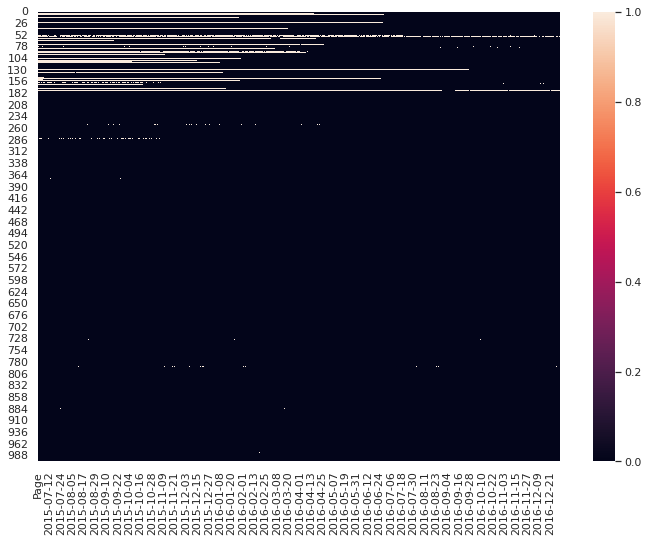

In [ ]:
import seaborn as sns
sns.heatmap(train.head(1000).isna())

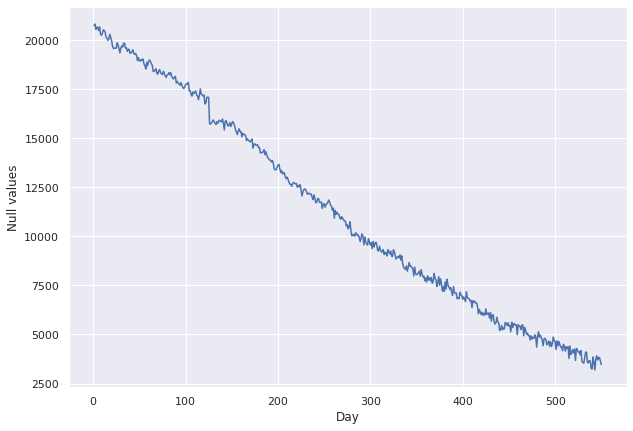

In [ ]:
days = [r for r in range(1, len(train.columns))]
plot.figure(figsize=(10,7))
plot.xlabel('Day')
plot.ylabel('Null values')
plot.plot(days, train.isnull().sum()[1:])

In [ ]:
xtrain=train.dropna(thresh=300)
print(xtrain.shape)

(133617, 551)


In [ ]:
train=train.fillna(0)
train.tail()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
145058,Underworld_(serie_de_películas)_es.wikipedia.o...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,13.0,12.0,13.0,3.0,5.0,10.0
145059,Resident_Evil:_Capítulo_Final_es.wikipedia.org...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
145060,Enamorándome_de_Ramón_es.wikipedia.org_all-acc...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
145061,Hasta_el_último_hombre_es.wikipedia.org_all-ac...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
145062,Francisco_el_matemático_(serie_de_televisión_d...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
x = '2NE1_zh.wikipedia.org_all-access_spider'

x[x.find('.wikipedia')-2:x.find('.wikipedia')]

'zh'

'ja':'Japanese', 'de':'German',  'en' : 'English',  'no_lang':'Media_File',  'fr':'French',  'zh':'Chinese',  'ru':'Russian',  'es':'Spanish'}

In [ ]:
def split_page(page):
  w = re.split('_|\.', page)

  return ' '.join(w[:-5]), w[-5], w[-2], w[-1]

li = list(train.Page.apply(split_page))
df = pd.DataFrame(li)
df.columns = ['Title', 'Language', 'Access_type','Access_origin']
df = pd.concat([train, df], axis = 1)

In [ ]:
df.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31,Title,Language,Access_type,Access_origin
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,14.0,20.0,22.0,19.0,18.0,20.0,2NE1,zh,all-access,spider
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,9.0,30.0,52.0,45.0,26.0,20.0,2PM,zh,all-access,spider
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,4.0,4.0,6.0,3.0,4.0,17.0,3C,zh,all-access,spider
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,16.0,11.0,17.0,19.0,10.0,11.0,4minute,zh,all-access,spider
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,11.0,27.0,13.0,36.0,10.0,52 Hz I Love You,zh,all-access,spider


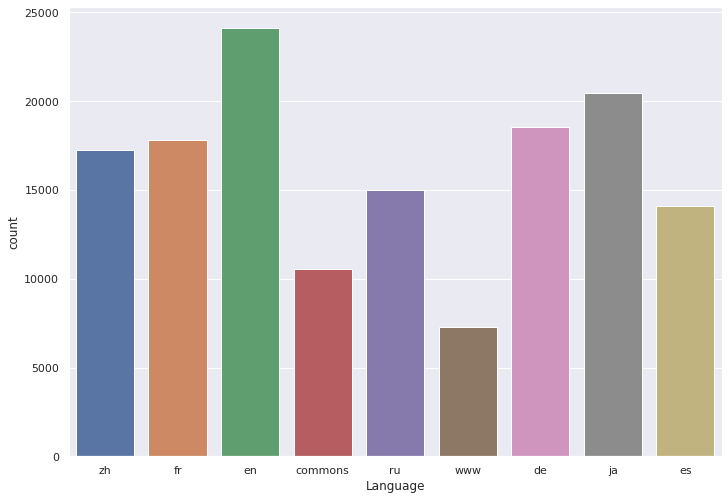

In [ ]:
sns.countplot(df['Language'])

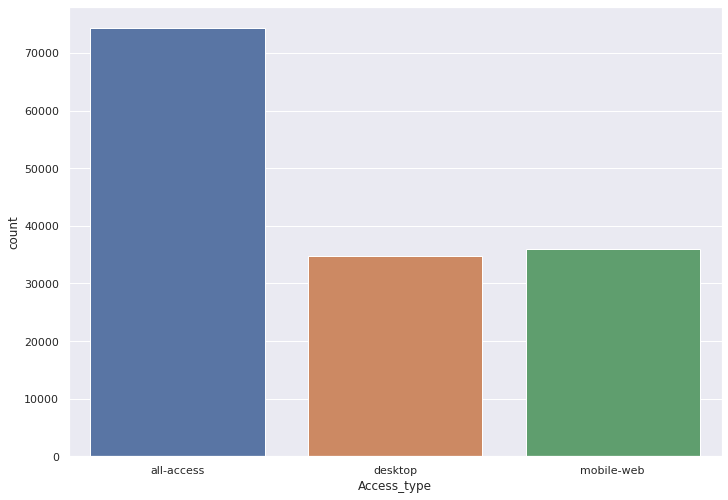

In [ ]:
sns.countplot(df['Access_type'])

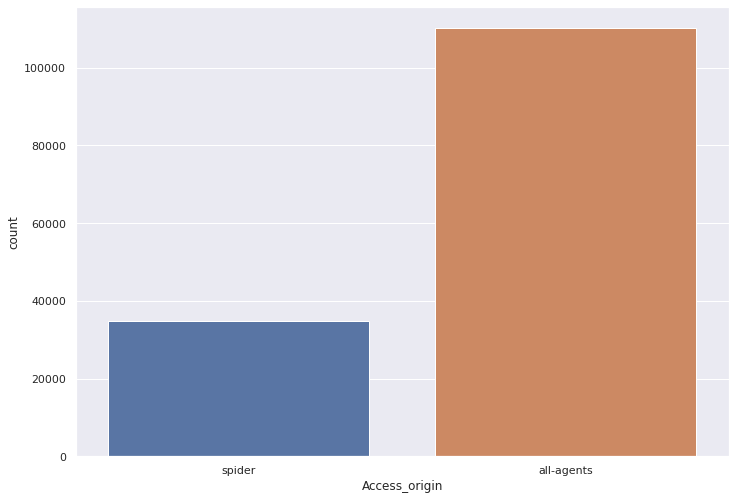

In [ ]:
sns.countplot(df['Access_origin'])

In [ ]:
val = re.search('[a-z][a-z].wikipedia.org', '2NE1_zh.wikipedia.org_all-access_spider')
val[0][:2]

'zh'

In [ ]:
# Checking another way of fetching the language out of the string
def lang(Page):
    val = re.search('[a-z][a-z].wikipedia.org',Page)
    if val:
        return val[0][0:2]

    return 'no_lang'

df['Language']=df['Page'].apply(lambda x: lang(str(x)))

In [ ]:
df.groupby('Language').count() #now the count has increased. You can go back and get it sorted

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31,Title,Access_type,Access_origin
Language,,,,,,,,,,,,,,,,,,,,,
de,18547,18547,18547,18547,18547,18547,18547,18547,18547,18547,...,18547,18547,18547,18547,18547,18547,18547,18547,18547,18547
en,24108,24108,24108,24108,24108,24108,24108,24108,24108,24108,...,24108,24108,24108,24108,24108,24108,24108,24108,24108,24108
es,14069,14069,14069,14069,14069,14069,14069,14069,14069,14069,...,14069,14069,14069,14069,14069,14069,14069,14069,14069,14069
fr,17802,17802,17802,17802,17802,17802,17802,17802,17802,17802,...,17802,17802,17802,17802,17802,17802,17802,17802,17802,17802
ja,20431,20431,20431,20431,20431,20431,20431,20431,20431,20431,...,20431,20431,20431,20431,20431,20431,20431,20431,20431,20431
no_lang,17855,17855,17855,17855,17855,17855,17855,17855,17855,17855,...,17855,17855,17855,17855,17855,17855,17855,17855,17855,17855
ru,15022,15022,15022,15022,15022,15022,15022,15022,15022,15022,...,15022,15022,15022,15022,15022,15022,15022,15022,15022,15022
zh,17229,17229,17229,17229,17229,17229,17229,17229,17229,17229,...,17229,17229,17229,17229,17229,17229,17229,17229,17229,17229


In [ ]:
df_language=df.groupby('Language').mean().transpose()
df_language

Language,de,en,es,fr,ja,no_lang,ru,zh
2015-07-01,714.968405,3513.862203,1085.972919,475.150994,580.647056,83.479922,629.999601,240.582042
2015-07-02,705.229741,3502.511407,1037.814557,478.202000,666.672801,87.471857,640.902876,240.941958
2015-07-03,676.877231,3325.357889,954.412680,459.837659,602.289805,82.680538,594.026295,239.344071
2015-07-04,621.145145,3462.054256,896.050750,491.508932,756.509177,70.572557,558.728132,241.653491
2015-07-05,722.076185,3575.520035,974.508210,482.557746,725.720914,78.214562,595.029157,257.779674
...,...,...,...,...,...,...,...,...
2016-12-27,1085.095379,6040.680728,1133.367901,858.413100,789.158680,147.038925,1001.209426,376.019618
2016-12-28,1032.640804,5860.227559,1178.290923,774.155769,790.500465,186.438029,931.987685,378.048639
2016-12-29,994.657141,6245.127510,1112.171085,752.712954,865.483236,147.297004,897.282452,350.719427
2016-12-30,949.265649,5201.783018,821.671405,700.543422,952.018354,164.540577,803.271868,354.704452


In [ ]:
df_language.reset_index(inplace=True)
df_language.set_index('index', inplace=True)

Text(0, 0.5, 'Views per Page')

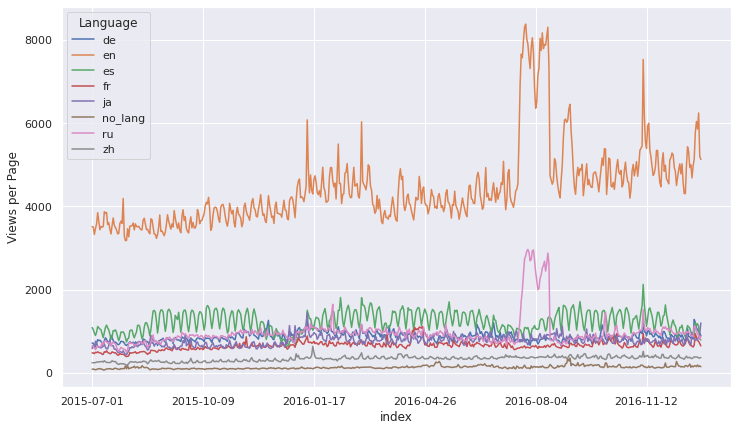

In [ ]:
df_language.plot(figsize=(12,7))
plot.ylabel('Views per Page')

In [ ]:
total_view=df_language.copy()

In [ ]:
from statsmodels.tsa.stattools import adfuller
def df_test(x):
    result=adfuller(x)
    print('ADF Stastistic: %f'%result[0])
    print('p-value: %f'%result[1])

df_test(total_view['en'])

ADF Stastistic: -2.247284
p-value: 0.189534


In [ ]:
ts=total_view['en']

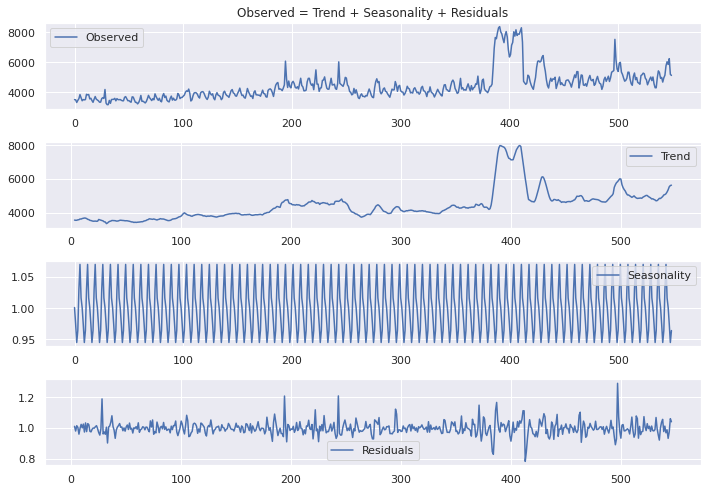

In [ ]:
# Naive decomposition of our Time Series as explained above
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts.values, model='multiplicative',freq = 7)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plot.figure(figsize=(10,7))
plot.subplot(411)
plot.title('Observed = Trend + Seasonality + Residuals')
plot.plot(ts.values,label='Observed')
plot.legend(loc='best')
plot.subplot(412)
plot.plot(trend, label='Trend')
plot.legend(loc='best')
plot.subplot(413)
plot.plot(seasonal,label='Seasonality')
plot.legend(loc='best')
plot.subplot(414)
plot.plot(residual, label='Residuals')
plot.legend(loc='best')
plot.tight_layout()
plot.show()

In [ ]:
ts_decompose=pd.DataFrame(residual).fillna(0)[0].values
df_test(ts_decompose)

ADF Stastistic: -3.686534
p-value: 0.004307


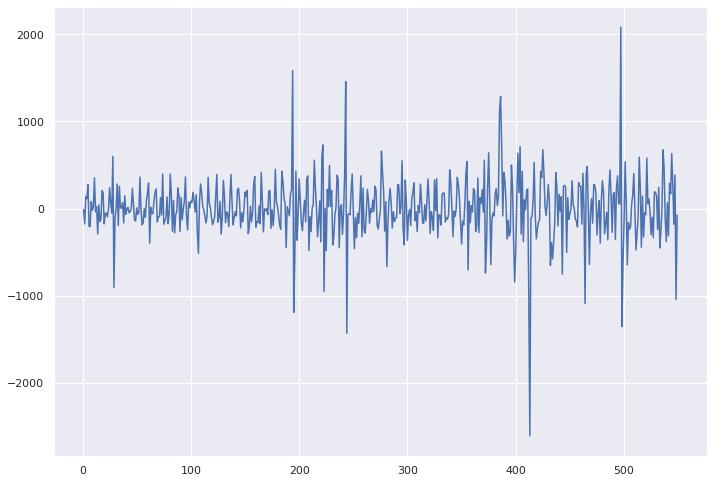

In [ ]:
ts_diff = ts - ts.shift(1)
plot.plot(ts_diff.values)
plot.show()

In [ ]:
ts_diff.dropna(inplace=True)
df_test(ts_diff)

ADF Stastistic: -8.254153
p-value: 0.000000


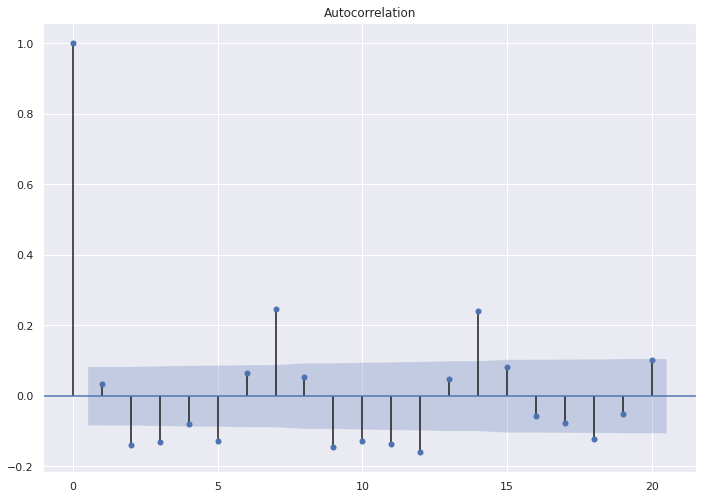

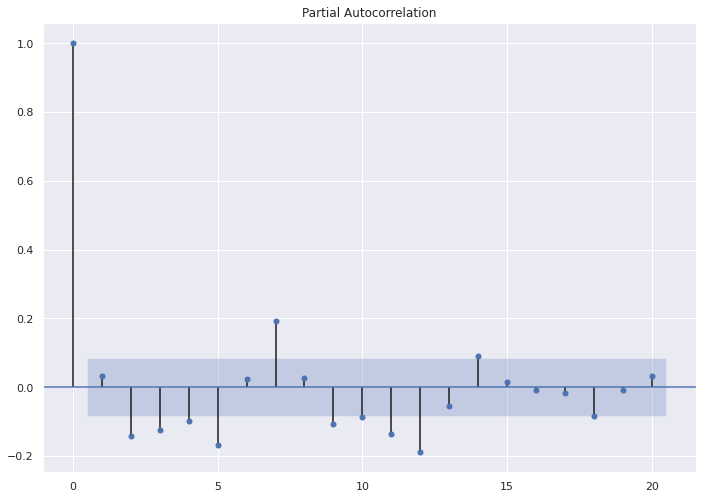

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
acf=plot_acf(ts_diff,lags=20)
pacf=plot_pacf(ts_diff,lags=20)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


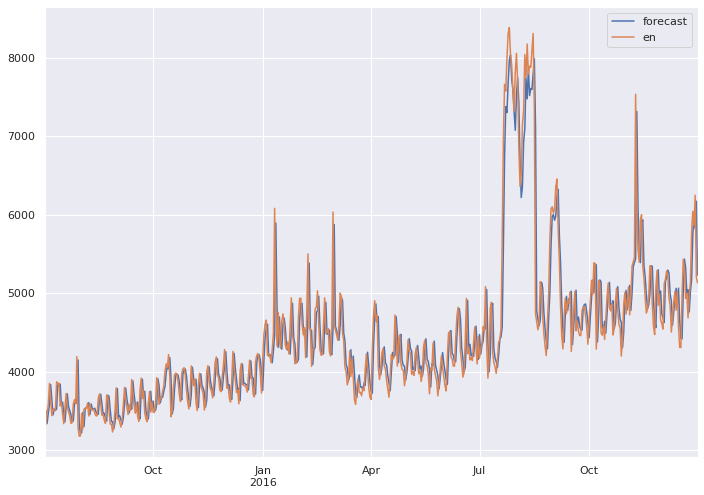

In [ ]:

from statsmodels.tsa.arima_model import ARIMA
from pandas import DataFrame

model = ARIMA(ts, order=(1,1,1))
model_fit = model.fit(disp=0)

model_fit.plot_predict(dynamic=False)
plot.show()

In [ ]:
train = ts[:-30]
test = ts[-30:]

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


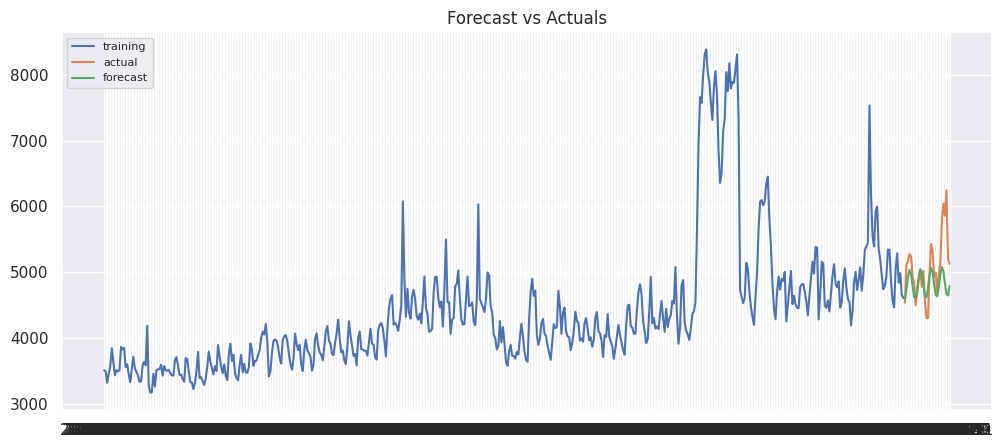

In [ ]:
model = ARIMA(train, order=(2, 1, 2))
fitted = model.fit(disp=-1)

# Forecast
fc, se, conf = fitted.forecast(30, alpha=0.02)

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
# Plot
plot.figure(figsize=(12,5), dpi=100)
plot.plot(train, label='training')
plot.plot(test, label='actual')
plot.plot(fc_series, label='forecast')

plot.title('Forecast vs Actuals')
plot.legend(loc='upper left', fontsize=8)

In [ ]:
mape = np.mean(np.abs(fc - test.values)/np.abs(test.values))
rmse = np.mean((fc - test.values)**2)**.5
print("mape:",mape)
print("rsme:",rmse)

mape: 0.06098294619482068
rsme: 473.4923714519789


In [ ]:
!gdown 1c2qOXLg4zfznv0EJKvjdR-UUp2GVpTSc


Downloading...
From: https://drive.google.com/uc?id=1c2qOXLg4zfznv0EJKvjdR-UUp2GVpTSc
To: /content/Exog_Campaign_eng
100% 1.10k/1.10k [00:00<00:00, 1.36MB/s]


In [ ]:
ex_df = pd.read_csv('Exog_Campaign_eng')
ex_df.head()

,Exog
0,0
1,0
2,0
3,0
4,0


In [ ]:
ex_df.value_counts()

Exog
0       496
1        54
dtype: int64

In [ ]:
exog=ex_df['Exog'].to_numpy()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


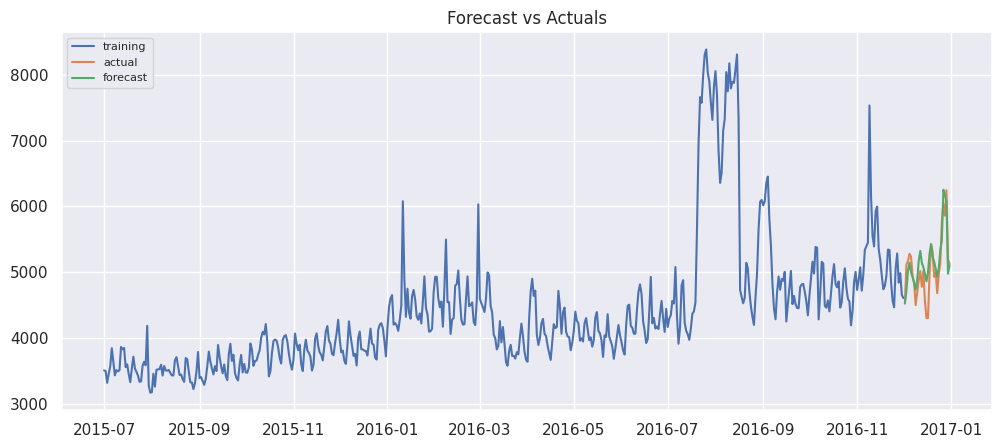

In [ ]:
import statsmodels.api as sm
train=ts[:520]
test=ts[520:]
model=sm.tsa.statespace.SARIMAX(train,order=(1, 1, 1),seasonal_order=(1,1,1,7),exog=exog[:520])
results=model.fit()

fc=results.forecast(30,dynamic=True,exog=pd.DataFrame(exog[520:]))

# Make as pandas series
fc_series = pd.Series(fc)
# Plot
train.index=train.index.astype('datetime64[ns]')
test.index=test.index.astype('datetime64[ns]')
plot.figure(figsize=(12,5), dpi=100)
plot.plot(train, label='training')
plot.plot(test, label='actual')
plot.plot(fc_series, label='forecast')

plot.title('Forecast vs Actuals')
plot.legend(loc='upper left', fontsize=8)

In [ ]:
mape = np.mean(np.abs(fc - test.values)/np.abs(test.values))
rmse = np.mean((fc - test.values)**2)**.5
print("mape:",mape)
print("rmse:",rmse)

mape: 0.044164974613345016
rmse: 270.3363228331589


In [ ]:
ts_df=ts.to_frame()
ts_df.head()

,en
index,
2015-07-01,3513.862203
2015-07-02,3502.511407
2015-07-03,3325.357889
2015-07-04,3462.054256
2015-07-05,3575.520035


In [ ]:
ts_df.reset_index(level=0, inplace=True)
ts_df['date']=pd.to_datetime(ts_df['index'])
ts_df.drop(['index'],axis=1,inplace=True)
ts_df.head()

,en,date
0,3513.862203,2015-07-01
1,3502.511407,2015-07-02
2,3325.357889,2015-07-03
3,3462.054256,2015-07-04
4,3575.520035,2015-07-05


In [ ]:
ts_df['day_of_week']=ts_df['date'].dt.day_name()
ts_df.head()

,en,date,day_of_week
0,3513.862203,2015-07-01,Wednesday
1,3502.511407,2015-07-02,Thursday
2,3325.357889,2015-07-03,Friday
3,3462.054256,2015-07-04,Saturday
4,3575.520035,2015-07-05,Sunday


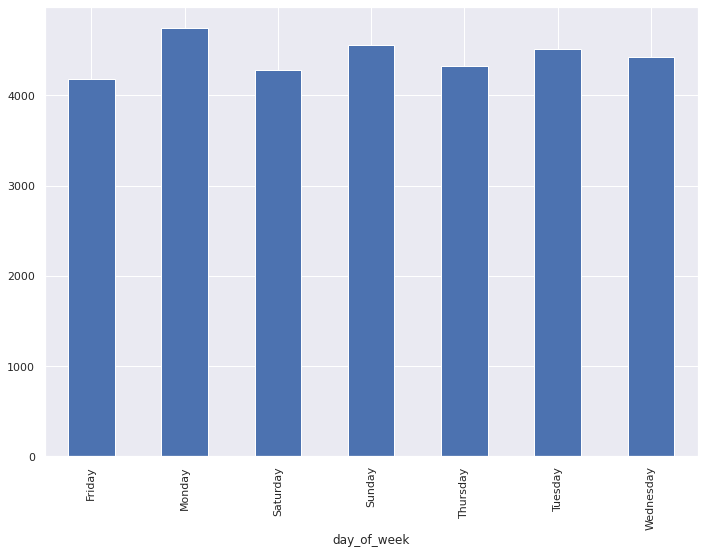

In [ ]:
ts_df.groupby('day_of_week')['en'].mean().plot(kind='bar')

In [ ]:
ts_df=pd.get_dummies(ts_df, columns = ['day_of_week'])
ts_df.head()

,en,date,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
0,3513.862203,2015-07-01,0,0,0,0,0,0,1
1,3502.511407,2015-07-02,0,0,0,0,1,0,0
2,3325.357889,2015-07-03,1,0,0,0,0,0,0
3,3462.054256,2015-07-04,0,0,1,0,0,0,0
4,3575.520035,2015-07-05,0,0,0,1,0,0,0


In [ ]:
ts_df['exog']=ex_df['Exog']
ts_df['rolling_mean']=ts_df['en'].shift(-1).rolling(7, center=False).mean()

In [ ]:
ts_df = ts_df[7:]

,en,date,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,exog,rolling_mean
7,3437.871080,2015-07-08,0,0,0,0,0,0,1,0,3544.503105
8,3517.459391,2015-07-09,0,0,0,0,1,0,0,0,3569.105063
9,3497.571594,2015-07-10,1,0,0,0,0,0,0,0,3576.962212
10,3517.054297,2015-07-11,0,0,1,0,0,0,0,0,3618.918095
11,3869.211216,2015-07-12,0,0,0,1,0,0,0,0,3616.444043


In [ ]:
ts_df = ts_df.dropna()

In [ ]:
X=ts_df[['day_of_week_Friday',	'day_of_week_Monday',	'day_of_week_Saturday',	'day_of_week_Sunday',	'day_of_week_Thursday',	'day_of_week_Tuesday',	'exog',	'rolling_mean']].copy()
y=ts_df[['en']]

train_x = X[:-30]
test_x = X[-30:]

train_y = y[:-30]
test_y = y[-30:]


In [ ]:
from sklearn.linear_model import LinearRegression

# Train and pred
model = LinearRegression()
model.fit(train_x, trasin_y)
y_pred = (model.predict(test_x))


mape = np.mean(np.abs(y_pred - test_y.values)/np.abs(test_y.values))
print("mape:",mape)


mape: 0.03505262302249117


In [ ]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67.3 MB 107 kB/s 
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 1.7 MB/s 
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=6639035 sha256=ee76ac52125e777d314cdcbd63fbe62e8395c76353dbdaab473b0542208450c0
  Stored in directory: /root/.cache/pip/wheels/cd/a1/12/db63ff624de492fe6cccf676091a0860fdde2ffde4bc3280e2
Successfully built fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.0.7
    Uninstalling cmdstanpy-1.0.7:
      Successfully uninstalled cmdstanpy-1.0.7
ERROR: pip's dependency resolver does not currently take into account all the 

# using Facebook Prophet

In [ ]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
ts_df['ds']=ts_df['date']
ts_df['y']=ts_df['en']

In [ ]:
df2=ts_df[['date','en','exog']].copy()
df2.columns = ['ds', 'y', 'exog']
df2.head()

,ds,y,exog
6,2015-07-07,3906.341724,0
7,2015-07-08,3685.854621,0
8,2015-07-09,3771.183714,0
9,2015-07-10,3749.860313,0
10,2015-07-11,3770.749355,0


In [ ]:
df2[:-20].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 524 entries, 6 to 529
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      524 non-null    datetime64[ns]
 1   y       524 non-null    float64       
 2   exog    524 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 16.4 KB


prophet without exogenous

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


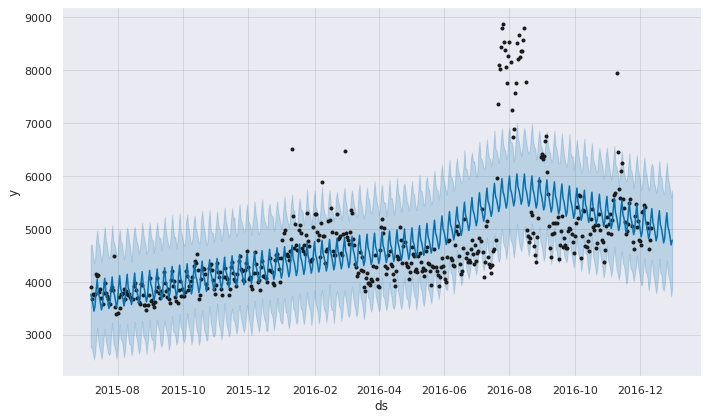

In [ ]:
from fbprophet import Prophet
m = Prophet(weekly_seasonality=True)
m.fit(df2[['ds', 'y']][:-20])
future = m.make_future_dataframe(periods=20,freq="D")
forecast = m.predict(future)
fig = m.plot(forecast)

prophet with exogenous

In [ ]:
from prophet import Prophet
? Prophet

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


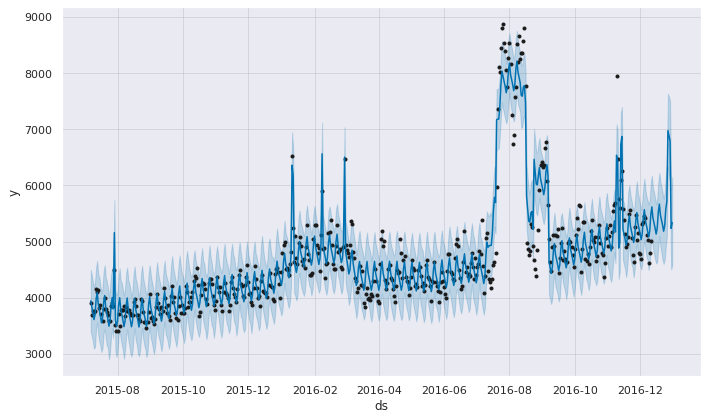

In [ ]:
model2=Prophet(interval_width=0.9, weekly_seasonality=True, changepoint_prior_scale=1)
model2.add_regressor('exog')
model2.fit(df2[:-20])
forecast2 = model2.predict(df2)
fig = model2.plot(forecast2)

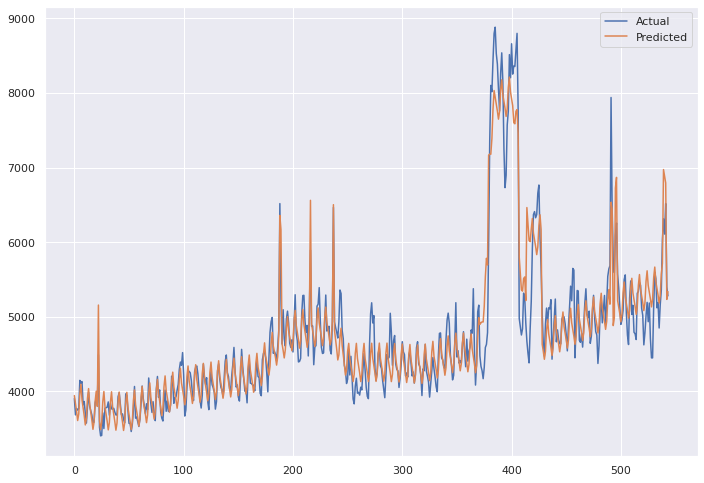

In [ ]:
y_true = df2['y'].values
y_pred = forecast2['yhat'].values

plot.plot(y_true, label='Actual')
plot.plot(y_pred, label='Predicted')
plot.legend()
plot.show()

In [ ]:
y_true = df2['y'].values
y_pred = forecast2['yhat'].values

mape = np.mean(np.abs(forecast2['yhat'][-20:] - df2['y'][-20:].values)/np.abs(df2['y'][-20:].values))
print("mape:",mape)

mape: 0.06592815614410931


# ------------------------------------------------------------------------------------------------------------------------------------------

# Comparing the predicted views for different languages

**For doing this we are going to automate the procedure from loading the separate data for each langauge to doing out of sample forecasting for the next month, and then comparing the results.**

In [ ]:
def grid_search(ts):
    v=[0,1,2,3]
    mape=100
    val=[0,0,0]
    for p in v:
        for d in v:
            for q in v:
                try:
                    model = ARIMA(ts[:-20], order=(p,d,q))
                    model_fit = model.fit(disp=-1)
                    fc, se, conf = model_fit.forecast(20, alpha=0.02)
                    x = np.mean(np.abs(fc - ts[-20:].values)/np.abs(ts[-20:].values))
                    if(x<mape):
                        mape=x
                        val=[p,d,q]

                except:
                    pass

    return(mape, val)

This functions works like a grid search for getting the best value of p,d,q by comparing the mape  of all models that we create.

the values of p,d,q that give the least mape score are saved and returned

In [ ]:
def all_arima(train,test,val):
    model = ARIMA(train, order=(val[0], val[1], val[2]))
    fitted = model.fit(disp=-1)

  # Forecast
    fc, se, conf = fitted.forecast(30, alpha=0.02)



    fc_series = pd.Series(fc, index=test.index)

  # Plot
    plot.figure(figsize=(12,5), dpi=100)
    plot.plot(train, label='training')
    plot.plot(test, label='actual')
    plot.plot(fc_series, label='forecast')
    plot.title('Forecast vs Actuals')
    plot.legend(loc='upper left', fontsize=8)
    plot.show()
    mape = np.mean(np.abs(fc - test.values)/np.abs(test.values))
    rmse = np.mean((fc - test.values)**2)**.5
    print("mape:",mape)
    print("rsme:",rmse)
    return (fc)


This function takes the p,d,q values that we calculated earlier and then trains a model on it, does forecast and plots them for visualization.

it also calculates the sum of forecased views for the next 30 days and returns it back

language:  de
0.09397758421308047 [3, 1, 3]


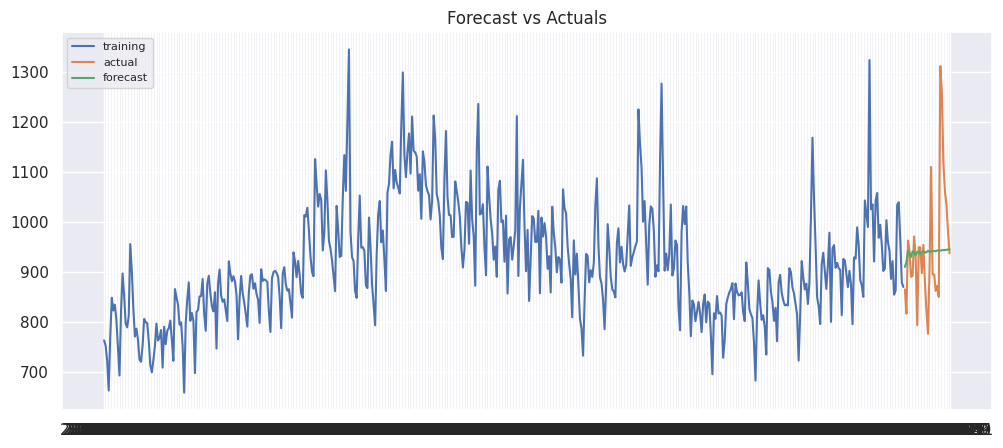

mape: 0.08451930259659801
rsme: 119.84846155914948
language:  en
0.07497050608151384 [3, 2, 0]


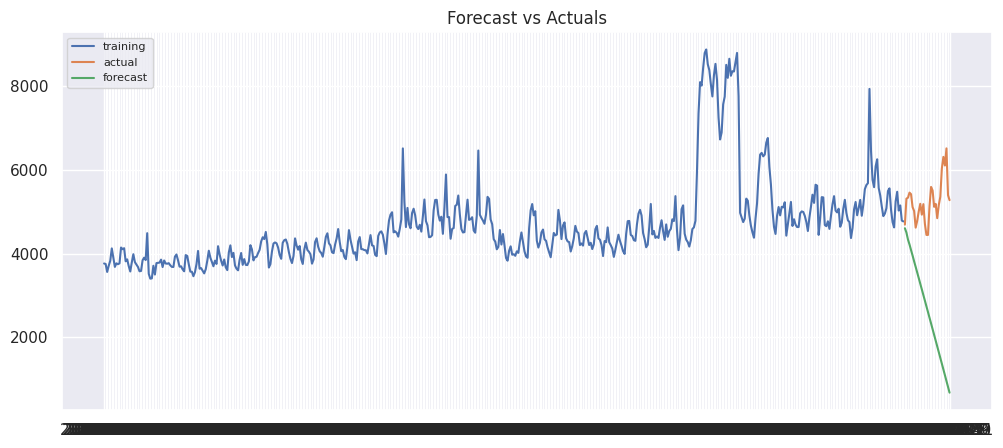

mape: 0.4781050962988165
rsme: 2972.249073736557
language:  es
0.08748369803155673 [3, 1, 3]


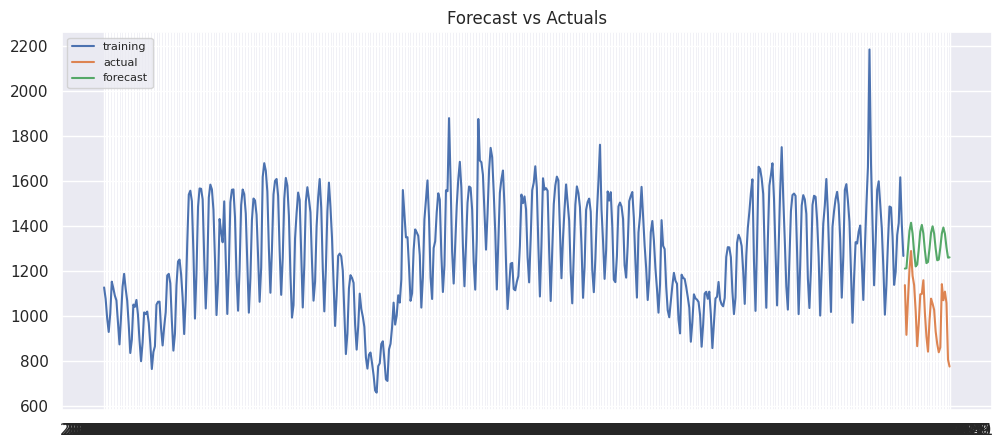

mape: 0.3032163163374593
rsme: 308.3268548323757
language:  fr
0.07922539990107266 [0, 0, 2]


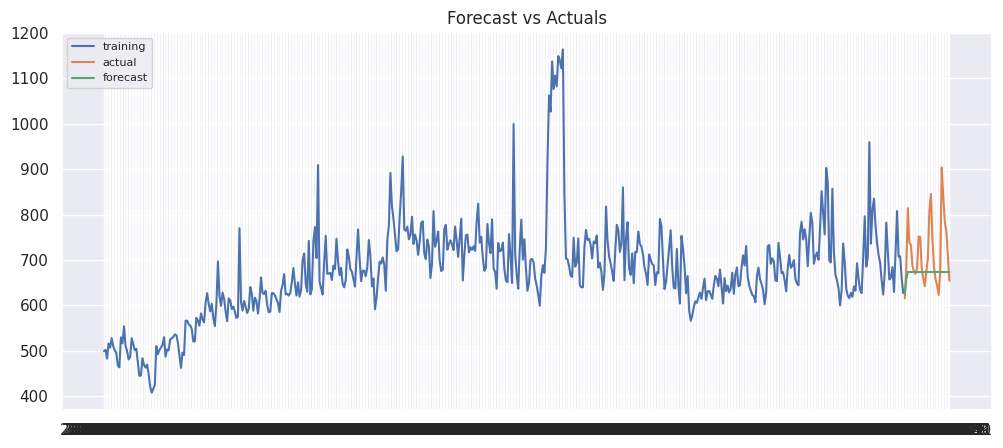

mape: 0.07316960356482773
rsme: 82.05815499130937
language:  ja
0.09306005747257282 [0, 0, 0]


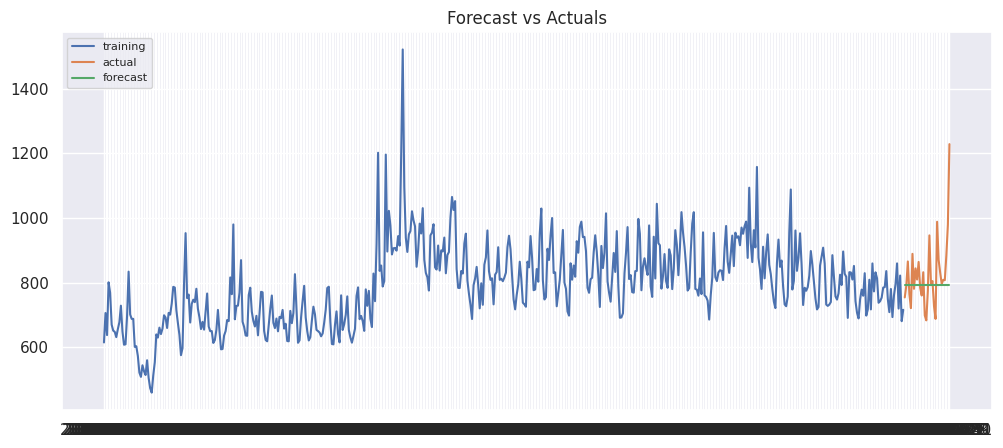

mape: 0.08086798857229117
rsme: 111.15944936830843
language:  no_lang
0.07911978906564705 [0, 0, 3]


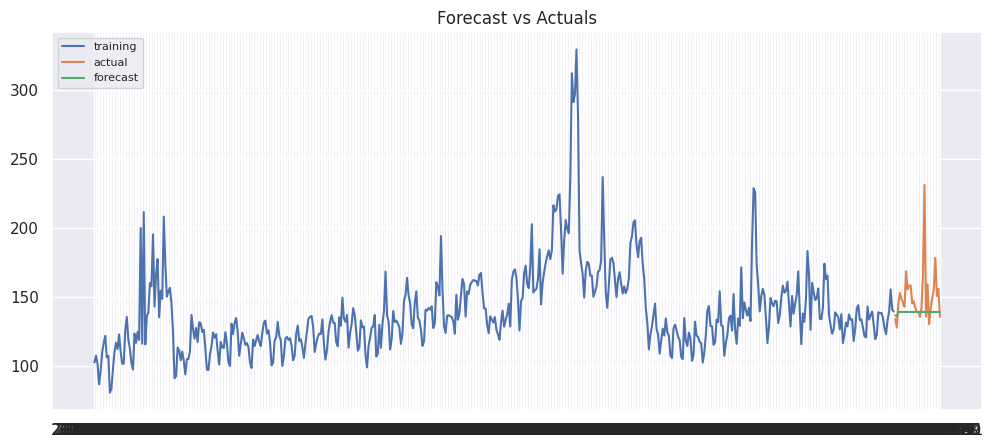

mape: 0.08096654200730383
rsme: 21.960681343449338
language:  ru
0.052023758161538015 [2, 2, 3]


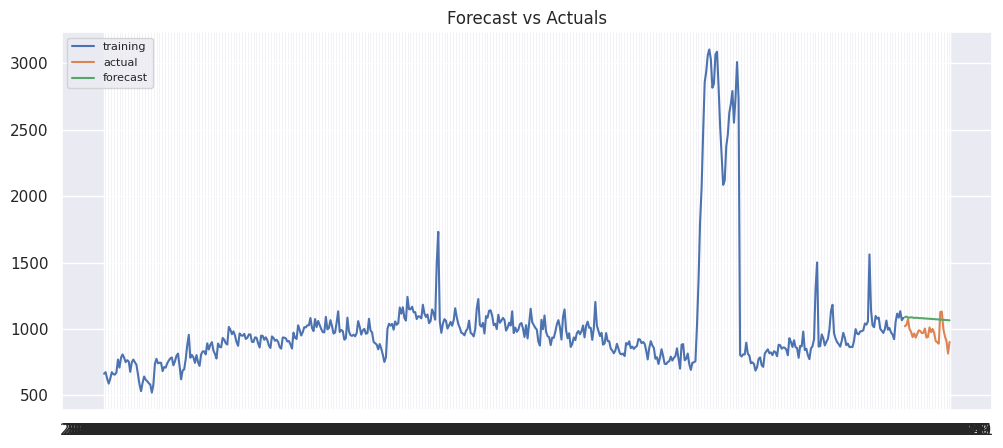

mape: 0.1196084671042122
rsme: 122.51049610367977
language:  zh
0.04467696433881181 [0, 0, 0]


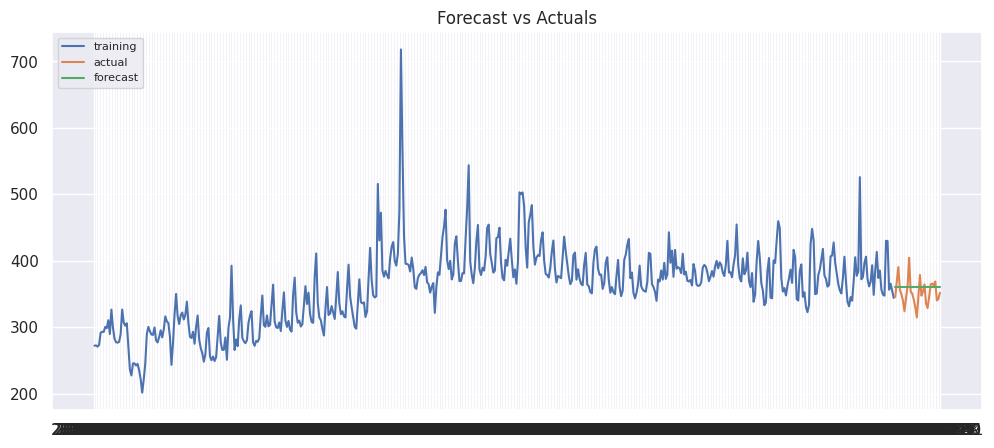

mape: 0.04704826775436991
rsme: 20.17502184263151


In [ ]:
import warnings
warnings.filterwarnings("ignore")
views_prediction={}
for c in total_view:
    print("language: ",c)
    ts=(total_view[c])
    mape,val=grid_search(ts)
    print(mape,val)
    train = ts[:520]
    test = ts[520:]
    fc=all_arima(train,test,val)
    views_prediction[c]=fc








* This function is what calls and drives all the other functions.

* It first gets the data for a particular language.

* checks stationarity.

* Gets the optimal p,d,q values from grid search

* uses that value to train the model, forecast and plot it

